We explore $P_\ell$ divergence estimates between the likelihood and pseudo-likelihood with 
truncated $k$-range in order to better understand where the non-Gaussianity is coming from. 

In [1]:
import numpy as np 
import scipy as sp 

import env
import util as UT
import nongauss as NG

In [14]:
from numpy.random import multivariate_normal as mvn

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

First lets try to reproduce the results from the paper

In [48]:
X_mock = NG.X_pk_all('patchy.z1', NorS='ngc', sys='fc')

In [50]:
X_mock_meansub, _ = NG.meansub(X_mock)
X_w, _ = NG.whiten(X_mock_meansub, method='pca')#, method='choletsky')

In [51]:
C_X = np.cov(X_w.T)

In [52]:
div_ref = [] 
for i in range(100): 
    Xref = mvn(np.zeros(X_mock.shape[1]), C_X, size=n_mock2)
    div_ref_i = NG.kNNdiv_gauss(Xref, C_X, Knn=10, div_func='kl', Nref=2000)
    div_ref.append(div_ref_i)

In [53]:
div = [] 
for i in range(100): 
    div_i = NG.kNNdiv_gauss(X_w, C_X, Knn=10, div_func='kl', Nref=2000)
    div.append(div_i)

In [138]:
print np.min(div), np.max(div), np.mean(div)

-0.261725 0.0238797 -0.131719


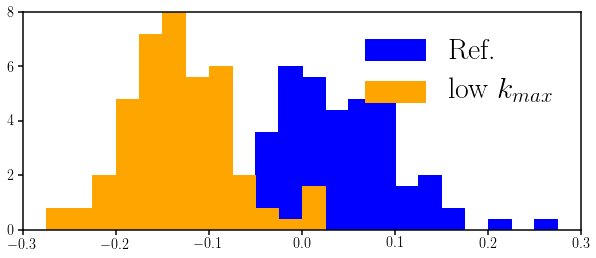

In [57]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 8.])
sub.set_xlim([-0.3, 0.3])
sub.legend(loc='upper right', prop={'size': 30})

Lets first decrease $k_{max}$ to $0.1$ for all $\ell = 0, 2, 4$. Lets construct `X_mock`

In [111]:
pk_list = [] 
for ell in [0, 2, 4]:     
    if ell == 4: krange_trun1 = [0.01, 0.1]
    else: krange_trunc1 = [0.01, 0.11]
    plk = NG.X_pk('patchy.z1', ell=ell, NorS='ngc', sys='fc', krange=krange_trunc1)
    pk_list.append(plk.T)
X_mock1 = np.concatenate(pk_list).T

In [112]:
n_mock = X_mock1.shape[0] # number of mocks
print n_mock, 'x', X_mock1.shape[1]

2048 x 30


standard mean subtract and whiten

In [86]:
X_mock1_meansub, _ = NG.meansub(X_mock1)
X_w1, W1 = NG.whiten(X_mock1_meansub, method='pca')

In [87]:
C_X1 = np.cov(X_w1.T)

Lets calculate the reference divergence $\hat{D}(X^\mathrm{ref} \parallel Y^\mathrm{ref})$

In [88]:
div_ref1 = [] 
for i in range(100): 
    Xref1 = mvn(np.zeros(X_mock1.shape[1]), C_X1, size=n_mock)
    div_ref1_i = NG.kNNdiv_gauss(Xref1, C_X1, Knn=10, div_func='kl', Nref=2000)
    div_ref1.append(div_ref1_i)

Now the divergence of interest

In [89]:
div_trunc1 = [] 
for i in range(100): 
    div_trunc1_i = NG.kNNdiv_gauss(X_w1, C_X1, Knn=10, div_func='kl', Nref=2000)
    div_trunc1.append(div_trunc1_i)

In [90]:
print np.min(div_trunc1), np.max(div_trunc1)

-0.181829 0.0389693


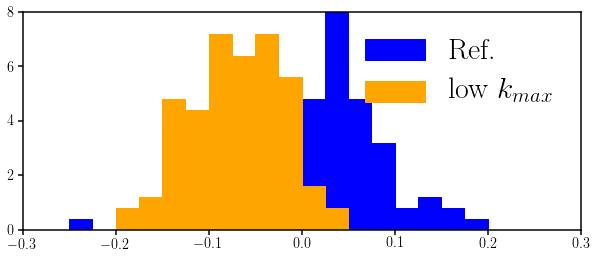

In [91]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref1, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc1, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 8.])
sub.set_xlim([-0.3, 0.3])
sub.legend(loc='upper right', prop={'size': 30})

Now lets increase $k_{min}$ to $0.05$

In [69]:
pk_list = [] 
for ell in [0, 2, 4]: 
    if ell == 4: krange_trun2 = [0.05, 0.1]
    else: krange_trunc2 = [0.05, 0.15]
    plk = NG.X_pk('patchy.z1', ell=ell, NorS='ngc', sys='fc', krange=krange_trunc2)
    pk_list.append(plk.T)
X_mock2 = np.concatenate(pk_list).T

In [70]:
n_mock2 = X_mock2.shape[0] # number of mocks
print n_mock2, 'x', X_mock2.shape[1]

2048 x 30


In [71]:
X_mock2_meansub, _ = NG.meansub(X_mock2)
X_w2, W2 = NG.whiten(X_mock2_meansub, method='pca')

In [72]:
C_X2 = np.cov(X_w2.T)

In [73]:
div_ref2 = [] 
for i in range(100): 
    Xref2 = mvn(np.zeros(X_mock2.shape[1]), C_X2, size=n_mock2)
    div_ref2_i = NG.kNNdiv_gauss(Xref2, C_X2, Knn=10, div_func='kl', Nref=2000)
    div_ref2.append(div_ref2_i)

In [74]:
div_trunc2 = [] 
for i in range(100): 
    div_trunc2_i = NG.kNNdiv_gauss(X_w2, C_X2, Knn=10, div_func='kl', Nref=2000)
    div_trunc2.append(div_trunc2_i)

In [137]:
print np.min(div_trunc2), np.max(div_trunc2), np.mean(div_trunc2)

-0.248498 -0.0246398 -0.139223


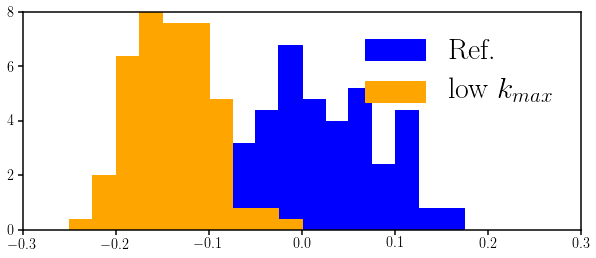

In [77]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref2, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc2, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 8.])
sub.set_xlim([-0.3, 0.3])
sub.legend(loc='upper right', prop={'size': 30})

Now without the hexadecapole

In [92]:
pk_list = [] 
for ell in [0, 2]: 
    plk = NG.X_pk('patchy.z1', ell=ell, NorS='ngc', sys='fc', krange=[0.01,0.15])
    pk_list.append(plk.T)
X_mock3 = np.concatenate(pk_list).T

In [93]:
n_mock = X_mock3.shape[0] # number of mocks
print n_mock, 'x', X_mock3.shape[1]

2048 x 28


In [94]:
X_mock3_meansub, _ = NG.meansub(X_mock3)
X_w3, _ = NG.whiten(X_mock3_meansub, method='pca')

In [95]:
C_X3 = np.cov(X_w3.T)

In [97]:
div_ref3 = [] 
for i in range(100): 
    Xref3 = mvn(np.zeros(X_mock3.shape[1]), C_X3, size=n_mock2)
    div_ref3_i = NG.kNNdiv_gauss(Xref3, C_X3, Knn=10, div_func='kl', Nref=2000)
    div_ref3.append(div_ref3_i)

In [98]:
div_trunc3 = [] 
for i in range(100): 
    div_trunc3_i = NG.kNNdiv_gauss(X_w3, C_X3, Knn=10, div_func='kl', Nref=2000)
    div_trunc3.append(div_trunc3_i)

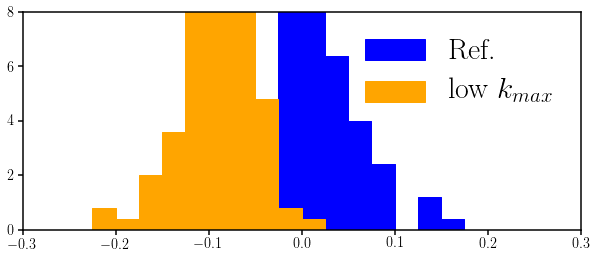

In [99]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref3, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc3, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 8.])
sub.set_xlim([-0.3, 0.3])
sub.legend(loc='upper right', prop={'size': 30})

In [128]:
pk_list = [] 
for ell in [0, 2, 4]: 
    if ell == 4: krange_trunc4 = [0.02, 0.1]
    else: krange_trunc4 = [0.01, 0.11]
    plk = NG.X_pk('patchy.z1', ell=ell, NorS='ngc', sys='fc', krange=krange_trunc4)
    pk_list.append(plk.T)
X_mock4 = np.concatenate(pk_list).T

(2048, 10)
(2048, 10)
(2048, 8)


In [130]:
print X_mock4.shape[0], 'x', X_mock4.shape[1]

2048 x 28


In [131]:
X_mock4_meansub, _ = NG.meansub(X_mock4)
X_w4, _ = NG.whiten(X_mock4_meansub, method='pca')

In [132]:
C_X4 = np.cov(X_w4.T)

In [134]:
div_ref4 = [] 
for i in range(100): 
    Xref4 = mvn(np.zeros(X_mock4.shape[1]), C_X4, size=n_mock2)
    div_ref4_i = NG.kNNdiv_gauss(Xref4, C_X4, Knn=10, div_func='kl', Nref=2000)
    div_ref4.append(div_ref4_i)

In [135]:
div_trunc4 = [] 
for i in range(100): 
    div_trunc4_i = NG.kNNdiv_gauss(X_w4, C_X4, Knn=10, div_func='kl', Nref=2000)
    div_trunc4.append(div_trunc4_i)

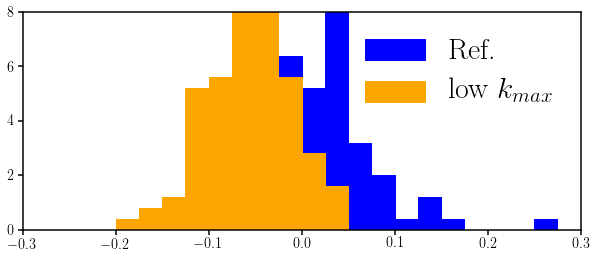

In [136]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
hh = np.histogram(div_ref4, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='blue', label='Ref.')
hh = np.histogram(div_trunc4, normed=True, range=[-0.5, 0.5], bins=40)
bp = UT.bar_plot(*hh)
sub.fill_between(bp[0], np.zeros(len(bp[0])), bp[1], edgecolor='none', color='orange', label='low $k_{max}$')
sub.set_ylim([0., 8.])
sub.set_xlim([-0.3, 0.3])
sub.legend(loc='upper right', prop={'size': 30})